Aim: Study the single neural network for different learning rates.


In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [15]:
epochs = 200
batch_size = 50

In [16]:
samples = 5000

yTrain = (torch.arange(samples,dtype = torch.float32).reshape(-1,1) % 2)

stddev = 0.15

xTrain = torch.randn(samples,2)*stddev + yTrain


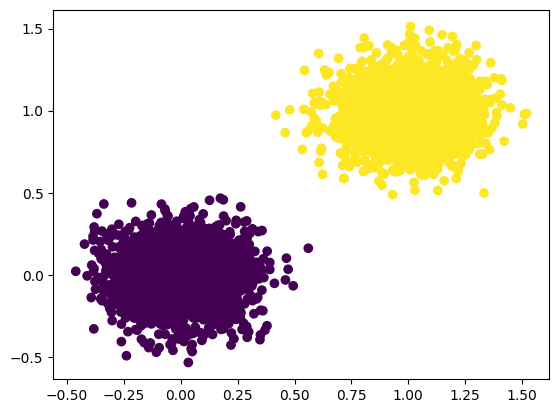

In [17]:
plt.scatter(x = xTrain[:,0],y = xTrain[:,1],c = yTrain.flatten())
plt.show()

In [18]:
#create model architecture
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.activation = nn.Sigmoid()
    self.l1 = nn.Linear(2,1)

  def forward(self,x):
    out1 = self.l1(x)
    act = self.activation(out1)
    return act

In [19]:
criteria = nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [20]:
lossHist = {}
epHist = []

lrList = [0.001,0.01,0.05,0.1,0.25]


steps = len(xTrain)
for lr in lrList:
  lossHist[lr] = []
  model = ANN()
  optimizer = torch.optim.Adam(model.parameters(),lr = lr)
  for e in range(epochs):
    for i in range(0,steps,batch_size):
      xBatch = xTrain[i:i+batch_size]
      yBatch = yTrain[i:i+batch_size]
      output = model(xBatch)
      loss = criteria(output,yBatch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    lossHist[lr].append(loss.item())
    epHist.append(e)
  print(f"Learning Rate: {lr} Final Loss: {loss.item()} ")

Learning Rate: 0.001 Final Loss: 0.00026319976313970983 
Learning Rate: 0.01 Final Loss: 8.783193266026501e-07 
Learning Rate: 0.05 Final Loss: 5.2562536545508465e-09 
Learning Rate: 0.1 Final Loss: 4.583554022441483e-11 
Learning Rate: 0.25 Final Loss: 2.1887726006641905e-12 


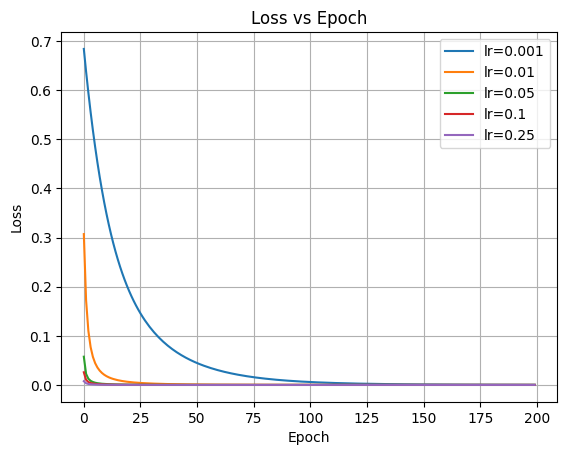

In [21]:
fg = plt.figure()
for lr in lrList:
  plt.plot(epHist[:200], torch.tensor(lossHist[lr]), label=f"lr={lr}")
plt.legend()
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

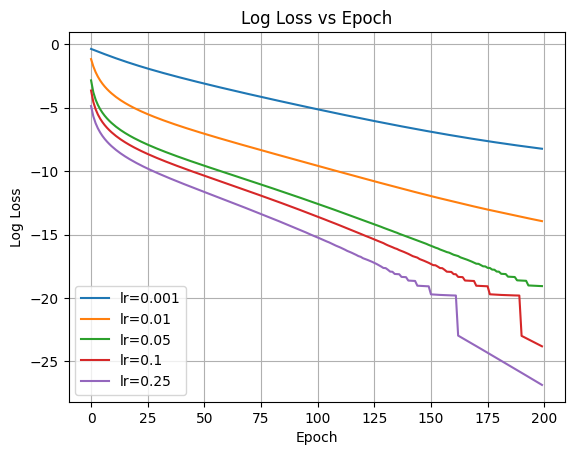

In [22]:
fg = plt.figure()
for lr in lrList:
  plt.plot(epHist[:200], torch.log(torch.tensor(lossHist[lr])), label=f"lr={lr}")
plt.legend()
plt.title("Log Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.grid()
plt.show()

In [23]:
#test
with torch.no_grad():
  xTest = torch.tensor([.9,.9])
  xTest = xTest.reshape(-1,2)
  out = model(xTest)
  print(out)
  print(" For input 0.9,0.9\nExpected value: Class 1")
  print(f"Predicted value: Class {round(out.item())}")

tensor([[1.]])
 For input 0.9,0.9
Expected value: Class 1
Predicted value: Class 1


In [24]:
#test
with torch.no_grad():
  xTest = torch.tensor([.4,.4])
  xTest = xTest.reshape(-1,2)
  out = model(xTest)
  print(out)
  print(" For input 0.4,0.4\nExpected value: Class 0")
  print(f"Predicted value: Class {round(out.item())}")

tensor([[0.0028]])
 For input 0.4,0.4
Expected value: Class 0
Predicted value: Class 0
